# Uber Supply-Demand Gap Assignment - Shailesh

In [214]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [215]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from datetime import datetime

In [216]:
# Read the CSV file into the dataframe uberdata

uberdata=pd.read_csv('Uber Request Data.csv')
uberdata.head()

Request id Pickup point  Driver id          Status    Request timestamp  \
0         619      Airport        1.0  Trip Completed      11/7/2016 11:51   
1         867      Airport        1.0  Trip Completed      11/7/2016 17:57   
2        1807         City        1.0  Trip Completed       12/7/2016 9:17   
3        2532      Airport        1.0  Trip Completed      12/7/2016 21:08   
4        3112         City        1.0  Trip Completed  13-07-2016 08:33:16   

        Drop timestamp  
0      11/7/2016 13:00  
1      11/7/2016 18:47  
2       12/7/2016 9:58  
3      12/7/2016 22:03  
4  13-07-2016 09:25:47

In [217]:
# Check the Different attributes of uberdata dataframe
uberdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [218]:
# Check the counts of the columns in uberdata dataframe

uberdata.describe()

Request id    Driver id
count  6745.000000  4095.000000
mean   3384.644922   149.501343
std    1955.099667    86.051994
min       1.000000     1.000000
25%    1691.000000    75.000000
50%    3387.000000   149.000000
75%    5080.000000   224.000000
max    6766.000000   300.000000

In [219]:
#Check the overall count in the dataset

uberdata.shape

(6745, 6)

In [220]:
# Check the count of Null Values in the Dataset

uberdata.isnull().sum().sort_values(ascending = False)

Drop timestamp       3914
Driver id            2650
Request timestamp       0
Status                  0
Pickup point            0
Request id              0
dtype: int64

In [221]:
# Check the % of Records which is null

round(100*uberdata.isnull().sum()/len(uberdata.index),2).sort_values(ascending = False)

Drop timestamp       58.03
Driver id            39.29
Request timestamp     0.00
Status                0.00
Pickup point          0.00
Request id            0.00
dtype: float64

In [222]:
# Check the Shape of the Dataset

uberdata.shape

(6745, 6)

In [223]:
# Impute the NaN's with reasonable values as deleting them would cause loss of information
# Replace the Driver id column with a -999 as it is NA
# Replace the Drop Timestamp Column with a "Default Date 12/12/2099 12:12"

uberdata['Driver id'] = uberdata['Driver id'].replace(np.nan, -999)
uberdata['Drop timestamp'] = uberdata['Drop timestamp'].replace(np.nan, pd.to_datetime('12/12/2099 12:12').strftime('%d-%m-%Y %H:%M'))
uberdata.head()

Request id Pickup point  Driver id          Status    Request timestamp  \
0         619      Airport        1.0  Trip Completed      11/7/2016 11:51   
1         867      Airport        1.0  Trip Completed      11/7/2016 17:57   
2        1807         City        1.0  Trip Completed       12/7/2016 9:17   
3        2532      Airport        1.0  Trip Completed      12/7/2016 21:08   
4        3112         City        1.0  Trip Completed  13-07-2016 08:33:16   

        Drop timestamp  
0      11/7/2016 13:00  
1      11/7/2016 18:47  
2       12/7/2016 9:58  
3      12/7/2016 22:03  
4  13-07-2016 09:25:47

In [224]:
# Check the Shape of the Dataset

uberdata.shape

(6745, 6)

In [225]:
# Check the % of Records which is null

round(100*uberdata.isnull().sum()/len(uberdata.index),2).sort_values(ascending = False)

Drop timestamp       0.0
Request timestamp    0.0
Status               0.0
Driver id            0.0
Pickup point         0.0
Request id           0.0
dtype: float64

In [226]:
# Convert the Object Datatype to Timestamp Datatype and create new columns Request_time and Drop_time

uberdata['Request_time'] = pd.to_datetime(uberdata['Request timestamp'])
uberdata['Drop_time'] = pd.to_datetime(uberdata['Drop timestamp'])

In [227]:
# Check the Datatype of the new columns

uberdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 8 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            6745 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       6745 non-null object
Request_time         6745 non-null datetime64[ns]
Drop_time            6745 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 421.6+ KB


In [228]:
# Convert the Columns in the Necessary Date Format

uberdata['Request_time'] = uberdata['Request_time'].dt.strftime('%d-%m-%Y %H:%M:%S')
uberdata['Drop_time'] = uberdata['Drop_time'].dt.strftime('%d-%m-%Y %H:%M:%S')

In [229]:
# Check the Datatype of the new columns

uberdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 8 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            6745 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       6745 non-null object
Request_time         6745 non-null object
Drop_time            6745 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 421.6+ KB


In [230]:
# Drop the Unwanted columns 

uberdata = uberdata.drop(['Request timestamp','Drop timestamp'], 1)
uberdata.head()

Request id Pickup point  Driver id          Status         Request_time  \
0         619      Airport        1.0  Trip Completed  07-11-2016 11:51:00   
1         867      Airport        1.0  Trip Completed  07-11-2016 17:57:00   
2        1807         City        1.0  Trip Completed  07-12-2016 09:17:00   
3        2532      Airport        1.0  Trip Completed  07-12-2016 21:08:00   
4        3112         City        1.0  Trip Completed  13-07-2016 08:33:16   

             Drop_time  
0  07-11-2016 13:00:00  
1  07-11-2016 18:47:00  
2  07-12-2016 09:58:00  
3  07-12-2016 22:03:00  
4  13-07-2016 09:25:47

In [231]:
# Rename Columns for Easier Calculations and better naming conventions

uberdata = uberdata.rename(columns={'Pickup point': 'Pickup_point','Driver id' : 'Driver_id','Request id' : 'Request_id'})
uberdata.head()

Request_id Pickup_point  Driver_id          Status         Request_time  \
0         619      Airport        1.0  Trip Completed  07-11-2016 11:51:00   
1         867      Airport        1.0  Trip Completed  07-11-2016 17:57:00   
2        1807         City        1.0  Trip Completed  07-12-2016 09:17:00   
3        2532      Airport        1.0  Trip Completed  07-12-2016 21:08:00   
4        3112         City        1.0  Trip Completed  13-07-2016 08:33:16   

             Drop_time  
0  07-11-2016 13:00:00  
1  07-11-2016 18:47:00  
2  07-12-2016 09:58:00  
3  07-12-2016 22:03:00  
4  13-07-2016 09:25:47

In [232]:
# Change the Datatype for easier calculations

uberdata['Pickup_point'] = uberdata['Pickup_point'].astype('category')
uberdata['Status'] = uberdata['Status'].astype('category')

# Convert this to int
uberdata['Driver_id'] = uberdata['Driver_id'].astype('int')

In [233]:
uberdata.head()

Request_id Pickup_point  Driver_id          Status         Request_time  \
0         619      Airport          1  Trip Completed  07-11-2016 11:51:00   
1         867      Airport          1  Trip Completed  07-11-2016 17:57:00   
2        1807         City          1  Trip Completed  07-12-2016 09:17:00   
3        2532      Airport          1  Trip Completed  07-12-2016 21:08:00   
4        3112         City          1  Trip Completed  13-07-2016 08:33:16   

             Drop_time  
0  07-11-2016 13:00:00  
1  07-11-2016 18:47:00  
2  07-12-2016 09:58:00  
3  07-12-2016 22:03:00  
4  13-07-2016 09:25:47

In [234]:
# Convert the Case to Uppercase just in case the columns have indifferent values

uberdata['Pickup_point'] = uberdata['Pickup_point'].str.upper() 
uberdata['Status'] = uberdata['Status'].str.upper() 
uberdata.head()

Request_id Pickup_point  Driver_id          Status         Request_time  \
0         619      AIRPORT          1  TRIP COMPLETED  07-11-2016 11:51:00   
1         867      AIRPORT          1  TRIP COMPLETED  07-11-2016 17:57:00   
2        1807         CITY          1  TRIP COMPLETED  07-12-2016 09:17:00   
3        2532      AIRPORT          1  TRIP COMPLETED  07-12-2016 21:08:00   
4        3112         CITY          1  TRIP COMPLETED  13-07-2016 08:33:16   

             Drop_time  
0  07-11-2016 13:00:00  
1  07-11-2016 18:47:00  
2  07-12-2016 09:58:00  
3  07-12-2016 22:03:00  
4  13-07-2016 09:25:47

In [235]:
# Create Dervied Columns necessary for the calculations

uberdata['Request_year'] = pd.DatetimeIndex(uberdata['Request_time']).year
uberdata['Request_month'] = pd.DatetimeIndex(uberdata['Request_time']).month
uberdata['Request_day'] = pd.DatetimeIndex(uberdata['Request_time']).day
uberdata['Request_hour'] = pd.DatetimeIndex(uberdata['Request_time']).hour
uberdata.head()


Request_id Pickup_point  Driver_id          Status         Request_time  \
0         619      AIRPORT          1  TRIP COMPLETED  07-11-2016 11:51:00   
1         867      AIRPORT          1  TRIP COMPLETED  07-11-2016 17:57:00   
2        1807         CITY          1  TRIP COMPLETED  07-12-2016 09:17:00   
3        2532      AIRPORT          1  TRIP COMPLETED  07-12-2016 21:08:00   
4        3112         CITY          1  TRIP COMPLETED  13-07-2016 08:33:16   

             Drop_time  Request_year  Request_month  Request_day  Request_hour  
0  07-11-2016 13:00:00          2016              7           11            11  
1  07-11-2016 18:47:00          2016              7           11            17  
2  07-12-2016 09:58:00          2016              7           12             9  
3  07-12-2016 22:03:00          2016              7           12            21  
4  13-07-2016 09:25:47          2016              7           13             8

In [236]:
# Create a New Columns Time Slot and add the following Categories
# PRE_MORNING : 0,1,2,3 AM
# MORNING_RUSH : 4,5,6,7,8,9 AM
# DAY_TIME : 10,11,12,13,14,15,16 (till 4PM)
# EVENING_RUSH : 17,18,19,20,21 (till 9 PM)
# LATE_NIGHT_RUSH : 22,23 (till 11 PM)

uberdata.loc[uberdata['Request_hour'].between(0, 4, inclusive=True), 'Time_Slot'] = 'PRE_MORNING'
uberdata.loc[uberdata['Request_hour'].between(4, 10, inclusive=True), 'Time_Slot'] = 'MORNING_RUSH'
uberdata.loc[uberdata['Request_hour'].between(10, 17, inclusive=True), 'Time_Slot'] = 'DAY_TIME'
uberdata.loc[uberdata['Request_hour'].between(17, 22, inclusive=True), 'Time_Slot'] = 'EVENING_RUSH'
uberdata.loc[uberdata['Request_hour'].between(22, 23, inclusive=True), 'Time_Slot'] = 'LATE_NIGHT_RUSH'
uberdata.head(20)

Request_id Pickup_point  Driver_id          Status         Request_time  \
0          619      AIRPORT          1  TRIP COMPLETED  07-11-2016 11:51:00   
1          867      AIRPORT          1  TRIP COMPLETED  07-11-2016 17:57:00   
2         1807         CITY          1  TRIP COMPLETED  07-12-2016 09:17:00   
3         2532      AIRPORT          1  TRIP COMPLETED  07-12-2016 21:08:00   
4         3112         CITY          1  TRIP COMPLETED  13-07-2016 08:33:16   
5         3879      AIRPORT          1  TRIP COMPLETED  13-07-2016 21:57:28   
6         4270      AIRPORT          1  TRIP COMPLETED  14-07-2016 06:15:32   
7         5510      AIRPORT          1  TRIP COMPLETED  15-07-2016 05:11:52   
8         6248         CITY          1  TRIP COMPLETED  15-07-2016 17:57:27   
9          267         CITY          2  TRIP COMPLETED  07-11-2016 06:46:00   
10        1467      AIRPORT          2  TRIP COMPLETED  07-12-2016 05:08:00   
11        1983         CITY          2  TRIP COMPLETED  07-12-2016 12:30:00   
12        2784      AIRPORT          2  TRIP COMPLETED  13-07-2016 04:49:20   
13        3075         CITY          2  TRIP COMPLETED  13-07-2016 08:02:53   
14        3379         CITY          2  TRIP COMPLETED  13-07-2016 14:23:02   
15        3482      AIRPORT          2  TRIP COMPLETED  13-07-2016 17:23:18   
16        4652         CITY          2  TRIP COMPLETED  14-07-2016 12:01:02   
17        5335      AIRPORT          2  TRIP COMPLETED  14-07-2016 22:24:13   
18         535      AIRPORT          3  TRIP COMPLETED  07-11-2016 10:00:00   
19         960      AIRPORT          3  TRIP COMPLETED  07-11-2016 18:45:00   

              Drop_time  Request_year  Request_month  Request_day  \
0   07-11-2016 13:00:00          2016              7           11   
1   07-11-2016 18:47:00          2016              7           11   
2   07-12-2016 09:58:00          2016              7           12   
3   07-12-2016 22:03:00          2016              7           12   
4   13-07-2016 09:25:47          2016              7           13   
5   13-07-2016 22:28:59          2016              7           13   
6   14-07-2016 07:13:15          2016              7           14   
7   15-07-2016 06:07:52          2016              7           15   
8   15-07-2016 18:50:51          2016              7           15   
9   07-11-2016 07:25:00          2016              7           11   
10  07-12-2016 06:02:00          2016              7           12   
11  07-12-2016 12:57:00          2016              7           12   
12  13-07-2016 05:23:03          2016              7           13   
13  13-07-2016 09:16:19          2016              7           13   
14  13-07-2016 15:35:18          2016              7           13   
15  13-07-2016 18:20:51          2016              7           13   
16  14-07-2016 12:36:46          2016              7           14   
17  14-07-2016 23:18:52          2016              7           14   
18  07-11-2016 10:31:00          2016              7           11   
19  07-11-2016 19:23:00          2016              7           11   

    Request_hour        Time_Slot  
0             11         DAY_TIME  
1             17     EVENING_RUSH  
2              9     MORNING_RUSH  
3             21     EVENING_RUSH  
4              8     MORNING_RUSH  
5             21     EVENING_RUSH  
6              6     MORNING_RUSH  
7              5     MORNING_RUSH  
8             17     EVENING_RUSH  
9              6     MORNING_RUSH  
10             5     MORNING_RUSH  
11            12         DAY_TIME  
12             4     MORNING_RUSH  
13             8     MORNING_RUSH  
14            14         DAY_TIME  
15            17     EVENING_RUSH  
16            12         DAY_TIME  
17            22  LATE_NIGHT_RUSH  
18            10         DAY_TIME  
19            18     EVENING_RUSH

In [237]:
# Create a New column called Supply which captures the Status = Trip Completed

uberdata['Supply'] = uberdata['Status'].str.contains('TRIP COMPLETED')
uberdata['Supply'] = uberdata['Supply'].map({True: '1', False: '0'})
uberdata.head()

Request_id Pickup_point  Driver_id          Status         Request_time  \
0         619      AIRPORT          1  TRIP COMPLETED  07-11-2016 11:51:00   
1         867      AIRPORT          1  TRIP COMPLETED  07-11-2016 17:57:00   
2        1807         CITY          1  TRIP COMPLETED  07-12-2016 09:17:00   
3        2532      AIRPORT          1  TRIP COMPLETED  07-12-2016 21:08:00   
4        3112         CITY          1  TRIP COMPLETED  13-07-2016 08:33:16   

             Drop_time  Request_year  Request_month  Request_day  \
0  07-11-2016 13:00:00          2016              7           11   
1  07-11-2016 18:47:00          2016              7           11   
2  07-12-2016 09:58:00          2016              7           12   
3  07-12-2016 22:03:00          2016              7           12   
4  13-07-2016 09:25:47          2016              7           13   

   Request_hour     Time_Slot Supply  
0            11      DAY_TIME      1  
1            17  EVENING_RUSH      1  
2             9  MORNING_RUSH      1  
3            21  EVENING_RUSH      1  
4             8  MORNING_RUSH      1

In [238]:
# Create a New column called Demand and Capture the Statuses of TRIP COMPLETED','CANCELLED','NO CARS AVAILABLE.

uberdata['Demand'] = uberdata['Status'].isin(['TRIP COMPLETED','CANCELLED','NO CARS AVAILABLE'])
uberdata['Demand'] = uberdata['Demand'].map({True: '1', False: '0'})
uberdata.head()

Request_id Pickup_point  Driver_id          Status         Request_time  \
0         619      AIRPORT          1  TRIP COMPLETED  07-11-2016 11:51:00   
1         867      AIRPORT          1  TRIP COMPLETED  07-11-2016 17:57:00   
2        1807         CITY          1  TRIP COMPLETED  07-12-2016 09:17:00   
3        2532      AIRPORT          1  TRIP COMPLETED  07-12-2016 21:08:00   
4        3112         CITY          1  TRIP COMPLETED  13-07-2016 08:33:16   

             Drop_time  Request_year  Request_month  Request_day  \
0  07-11-2016 13:00:00          2016              7           11   
1  07-11-2016 18:47:00          2016              7           11   
2  07-12-2016 09:58:00          2016              7           12   
3  07-12-2016 22:03:00          2016              7           12   
4  13-07-2016 09:25:47          2016              7           13   

   Request_hour     Time_Slot Supply Demand  
0            11      DAY_TIME      1      1  
1            17  EVENING_RUSH      1      1  
2             9  MORNING_RUSH      1      1  
3            21  EVENING_RUSH      1      1  
4             8  MORNING_RUSH      1      1

In [239]:
# Check the Datatypes of the columns 

uberdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 13 columns):
Request_id       6745 non-null int64
Pickup_point     6745 non-null object
Driver_id        6745 non-null int32
Status           6745 non-null object
Request_time     6745 non-null object
Drop_time        6745 non-null object
Request_year     6745 non-null int64
Request_month    6745 non-null int64
Request_day      6745 non-null int64
Request_hour     6745 non-null int64
Time_Slot        6745 non-null object
Supply           6745 non-null object
Demand           6745 non-null object
dtypes: int32(1), int64(5), object(7)
memory usage: 658.8+ KB


In [240]:
# Convert the datatype to integer for further calculations

uberdata['Supply'] = uberdata['Supply'].astype('int64')
uberdata['Demand'] = uberdata['Demand'].astype('int64')
uberdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 13 columns):
Request_id       6745 non-null int64
Pickup_point     6745 non-null object
Driver_id        6745 non-null int32
Status           6745 non-null object
Request_time     6745 non-null object
Drop_time        6745 non-null object
Request_year     6745 non-null int64
Request_month    6745 non-null int64
Request_day      6745 non-null int64
Request_hour     6745 non-null int64
Time_Slot        6745 non-null object
Supply           6745 non-null int64
Demand           6745 non-null int64
dtypes: int32(1), int64(7), object(5)
memory usage: 658.8+ KB


In [241]:
# Create another new column called Gap which gives Demand - Supply

uberdata['Gap'] = uberdata['Demand'] - uberdata['Supply']
uberdata.head()

Request_id Pickup_point  Driver_id          Status         Request_time  \
0         619      AIRPORT          1  TRIP COMPLETED  07-11-2016 11:51:00   
1         867      AIRPORT          1  TRIP COMPLETED  07-11-2016 17:57:00   
2        1807         CITY          1  TRIP COMPLETED  07-12-2016 09:17:00   
3        2532      AIRPORT          1  TRIP COMPLETED  07-12-2016 21:08:00   
4        3112         CITY          1  TRIP COMPLETED  13-07-2016 08:33:16   

             Drop_time  Request_year  Request_month  Request_day  \
0  07-11-2016 13:00:00          2016              7           11   
1  07-11-2016 18:47:00          2016              7           11   
2  07-12-2016 09:58:00          2016              7           12   
3  07-12-2016 22:03:00          2016              7           12   
4  13-07-2016 09:25:47          2016              7           13   

   Request_hour     Time_Slot  Supply  Demand  Gap  
0            11      DAY_TIME       1       1    0  
1            17  EVENING_RUSH       1       1    0  
2             9  MORNING_RUSH       1       1    0  
3            21  EVENING_RUSH       1       1    0  
4             8  MORNING_RUSH       1       1    0

## The Dataset is cleaned and added the necessary dervied columns for Analysis. Let us now plot some graphs to analyse the data in more detail


# Plots using Seaborn and Matplotlib

## 1. Check the Count of Time Slots

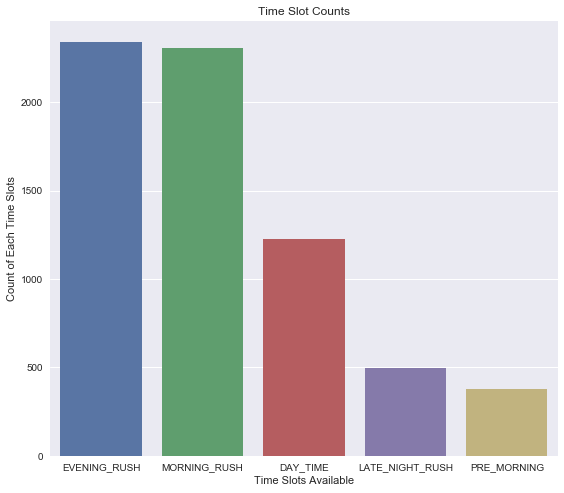

In [242]:
# This Graph shows the frequencies of Time Slots which are in high demand
plt.figure(figsize=(20, 8))
sns.set(style="darkgrid")
plt.subplot(1, 2, 1)
sns.countplot(data = uberdata, x='Time_Slot', order=uberdata.Time_Slot.value_counts().index)
plt.title("Time Slot Counts")
plt.xlabel("Time Slots Available")
plt.ylabel("Count of Each Time Slots")
plt.show()


In [243]:
# As we can see from the Graph and the dataset, there is a lot of demand in the Evening and Morning
uberdata.groupby('Time_Slot')['Time_Slot'].count().sort_values(ascending=False)

Time_Slot
EVENING_RUSH       2342
MORNING_RUSH       2306
DAY_TIME           1224
LATE_NIGHT_RUSH     498
PRE_MORNING         375
Name: Time_Slot, dtype: int64

### We can clearly see 2 slots dominating the graph.
### 1. EVENING_RUSH - 2342 <br>2. MORNING_RUSH - 2306 <br> Hence there is a lot of demand for the above 2 slots



## 2. Check the Count of Time Slots adding an extra level of Aggregation "STATUS"

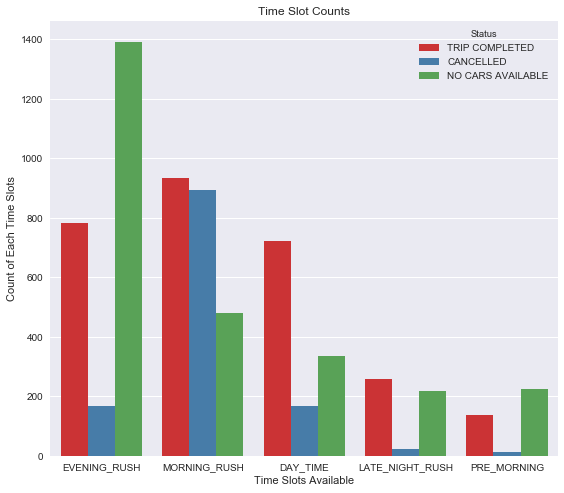

In [244]:
# This Graph shows the frequencies of Time Slots which are in high demand
plt.figure(figsize=(20, 8))
sns.set(style="darkgrid")
plt.subplot(1, 2, 1)
sns.countplot(data = uberdata, x='Time_Slot', hue = 'Status',order=uberdata.Time_Slot.value_counts().index,palette="Set1")
plt.title("Time Slot Counts")
plt.xlabel("Time Slots Available")
plt.ylabel("Count of Each Time Slots")
plt.show()


In [245]:
# As we can see from the Graph and the dataset, there is a lot of demand in the Evening and Morning
uberdata.groupby(['Time_Slot', 'Status'])['Time_Slot'].count()

Time_Slot        Status           
DAY_TIME         CANCELLED             168
                 NO CARS AVAILABLE     334
                 TRIP COMPLETED        722
EVENING_RUSH     CANCELLED             166
                 NO CARS AVAILABLE    1392
                 TRIP COMPLETED        784
LATE_NIGHT_RUSH  CANCELLED              22
                 NO CARS AVAILABLE     219
                 TRIP COMPLETED        257
MORNING_RUSH     CANCELLED             894
                 NO CARS AVAILABLE     480
                 TRIP COMPLETED        932
PRE_MORNING      CANCELLED              14
                 NO CARS AVAILABLE     225
                 TRIP COMPLETED        136
Name: Time_Slot, dtype: int64

### Issue 1 : It is evident that, during the "EVENING_RUSH" 1392 have reported as "NO CARS AVAILABLE" <br> Issue 2 : It is evident that, during the "MORNING RUSH" 894 have reported as "CANCELLED". <br><br>Even the though the demand is high, there is no sufficient supply of vehicles


## 3. Let us now check the Time Slots where the Majority Gap exists

In [246]:
# Create a New Dataframe called uber_supply_demand_gap

uber_supply_demand_gap = uberdata.groupby('Time_Slot')[['Demand','Supply','Gap']].sum()
uber_supply_demand_gap

Demand  Supply   Gap
Time_Slot                            
DAY_TIME           1224     722   502
EVENING_RUSH       2342     784  1558
LATE_NIGHT_RUSH     498     257   241
MORNING_RUSH       2306     932  1374
PRE_MORNING         375     136   239

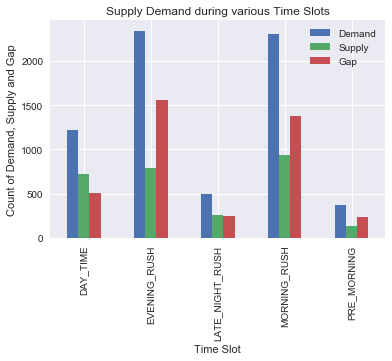

In [247]:
# Plot the Distribution to check where the Demand is High and where the Gap is the Highest
uber_supply_demand_gap.plot.bar()
plt.xlabel("Time Slot")
plt.ylabel("Count of Demand, Supply and Gap")
plt.title("Supply Demand during various Time Slots")
plt.show()

## The Majority Gap exists in EVENING_RUSH and MORNING_RUSH Slots


## 4. Check the Counts where the booking was made from.
### 1. Airport to City or 2. City to Airport

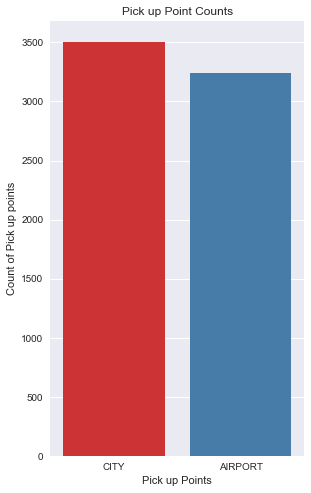

In [248]:
# This Graph shows the frequencies of Time Slots which are in high demand as well as the Trip Status
plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")
plt.subplot(1, 2, 1)
sns.countplot(data = uberdata, x='Pickup_point', order=uberdata.Pickup_point.value_counts().index, palette="Set1")
plt.title("Pick up Point Counts")
plt.xlabel("Pick up Points")
plt.ylabel("Count of Pick up points")
plt.show()


In [249]:
# As we can see from the Graph and the dataset, there is a lot of demand in the Evening and Morning
uberdata.groupby('Pickup_point')['Pickup_point'].count().sort_values(ascending=False)

Pickup_point
CITY       3507
AIRPORT    3238
Name: Pickup_point, dtype: int64

### a. City to Airport = 3507 Bookings were made<br> b. Airport to City = 3238 Bookings were made

## 5. Check the Counts using another level of aggregation using Pickup Point

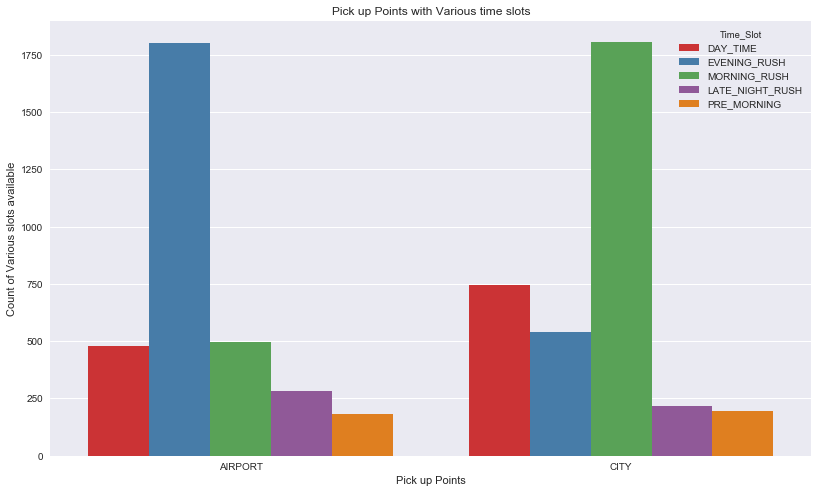

In [250]:
# This Graph shows the frequencies of Time Slots which are in high demand as well as the Pickup Points
plt.figure(figsize=(30, 8))
sns.set(style="darkgrid")
plt.subplot(1, 2, 1)
sns.countplot(data = uberdata, x='Pickup_point', hue = 'Time_Slot',order=uberdata.Pickup_point.value_counts().index.sort_values(ascending = True), palette="Set1")
plt.title("Pick up Points with Various time slots")
plt.xlabel("Pick up Points")
plt.ylabel("Count of Various slots available")
plt.show()


In [251]:
# As we can see from the Graph and the dataset, there is a lot of demand in the Evening and Morning

uberdata.groupby(['Pickup_point', 'Time_Slot'])['Pickup_point'].count()

Pickup_point  Time_Slot      
AIRPORT       DAY_TIME            478
              EVENING_RUSH       1800
              LATE_NIGHT_RUSH     281
              MORNING_RUSH        498
              PRE_MORNING         181
CITY          DAY_TIME            746
              EVENING_RUSH        542
              LATE_NIGHT_RUSH     217
              MORNING_RUSH       1808
              PRE_MORNING         194
Name: Pickup_point, dtype: int64

## There is a Lot of Demand from Airport to City in the Evening = 1800
## There is a Lot of Demand from City to Airport in the Morning = 1808

In [252]:
# Create a New Dataframe uber_pickup_supply_demand_gap keeping the Pickup_point, Time_Slot based on Demand Supply and Gap

uber_pickup_supply_demand_gap = uberdata.groupby(['Pickup_point','Time_Slot'])[['Demand','Supply','Gap']].sum()
uber_pickup_supply_demand_gap

Demand  Supply   Gap
Pickup_point Time_Slot                            
AIRPORT      DAY_TIME            478     327   151
             EVENING_RUSH       1800     373  1427
             LATE_NIGHT_RUSH     281     142   139
             MORNING_RUSH        498     418    80
             PRE_MORNING         181      67   114
CITY         DAY_TIME            746     395   351
             EVENING_RUSH        542     411   131
             LATE_NIGHT_RUSH     217     115   102
             MORNING_RUSH       1808     514  1294
             PRE_MORNING         194      69   125

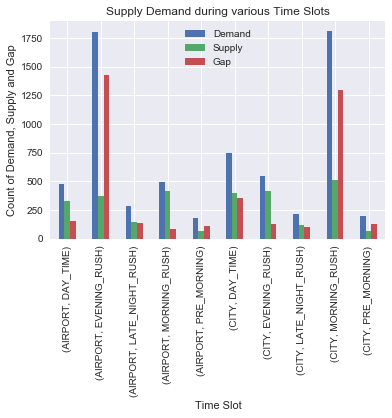

In [253]:
# Plot the Distribution to check where the Demand is High and where the Gap is the Highest
uber_pickup_supply_demand_gap.plot.bar()
plt.xlabel("Time Slot")
plt.ylabel("Count of Demand, Supply and Gap")
plt.title("Supply Demand during various Time Slots")
plt.show()

# The Majority Gap exists during the 2 Slots
## 1. Pickup Point = Airport, Time Slot = Evening Rush <br> 2. Pickup Point = City, Time Slot = Morning Rush

## 6. Let us Analyze the Demand and Supply that was met during the "EVENING_RUSH"

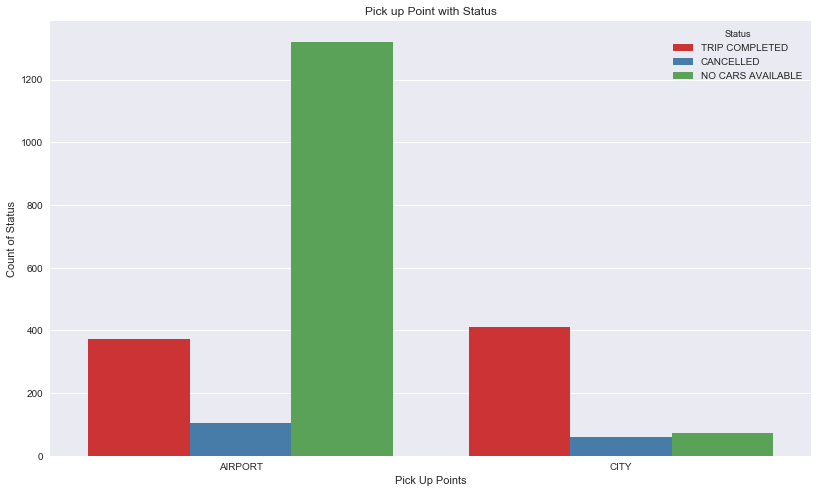

In [254]:
# This Graph shows the frequencies of Time Slots which are in high demand as well as the Trip Status
uberdata_evening = uberdata[(uberdata.Time_Slot=='EVENING_RUSH')]

plt.figure(figsize=(30, 8))
sns.set(style="darkgrid")
plt.subplot(1, 2, 1)
sns.countplot(data = uberdata_evening, x='Pickup_point', hue = 'Status', order=uberdata_evening.Pickup_point.value_counts().index, palette="Set1")
plt.title("Pick up Point with Status")
plt.xlabel("Pick Up Points")
plt.ylabel("Count of Status")
plt.show()


In [255]:
# As we can see from the Graph and the dataset, there is a lot of demand in the Evening and Morning
uberdata_evening.groupby(['Pickup_point', 'Time_Slot', 'Status'])['Pickup_point'].count()

Pickup_point  Time_Slot     Status           
AIRPORT       EVENING_RUSH  CANCELLED             106
                            NO CARS AVAILABLE    1321
                            TRIP COMPLETED        373
CITY          EVENING_RUSH  CANCELLED              60
                            NO CARS AVAILABLE      71
                            TRIP COMPLETED        411
Name: Pickup_point, dtype: int64

### It is evident that during the "EVENING_RUSH" there are 1321 Trips that could not be satisfied due to "NO CARS AVAILABLE" from AIRPORT to CITY

## 6a. Demand in the Evening from Airport

In [256]:
## Demand in the Evening from Airport
demand_from_airport = len(uberdata_evening.loc[(uberdata_evening.Pickup_point=='AIRPORT')])
demand_from_airport

1800

## 6b. Supply of Vehicles in the Evening from Airport

In [257]:
## Check the Supply that was satisfied from Airport to City during the "EVENING_RUSH"

supply_from_airport = len(uberdata_evening.loc[(uberdata_evening.Status=='TRIP COMPLETED') 
& (uberdata_evening.Pickup_point=='AIRPORT')])

supply_from_airport

373

## 6c. Gap between Supply and Demand from Airport to city during Evening Rush

In [258]:
gap_evening_from_airport = round(100*supply_from_airport / demand_from_airport,2)
gap_evening_from_airport

20.72


### Only ~20.72% of requests were serviced during the EVENING_RUSH from Airport to City

In [259]:
# Check the Reason why most requests were not satisfied

no_cars_from_airport = len(uberdata_evening.loc[(uberdata_evening.Status=='NO CARS AVAILABLE') 
& (uberdata_evening.Pickup_point=='AIRPORT')])

no_cars_from_airport

1321

In [260]:
# Number of rides cancelled from Airport to City during the Evening

cancelled_from_airport = len(uberdata_evening.loc[(uberdata_evening.Status=='CANCELLED') 
& (uberdata_evening.Pickup_point=='AIRPORT')])

cancelled_from_airport

106

In [261]:
# % of requests that could not serviced due to "NO CARS AVAILABLE"

non_serviced_from_airport = round(100*no_cars_from_airport / demand_from_airport,2)
non_serviced_from_airport

73.39

### Around 73.39% of requests were not servicable during the EVENING_RUSH from Airport to City due to "NO CARS AVAILABLE"

In [262]:
non_serviced_cancelled_from_airport = round(100*cancelled_from_airport / demand_from_airport,2)
non_serviced_cancelled_from_airport

5.89

### Around 5.89% of requests were not servicable during the EVENING_RUSH from Airport to City due to "CANCELLED"

## 7. Let us Analysze the Demand and Supply that was met during the "MORNING_RUSH"

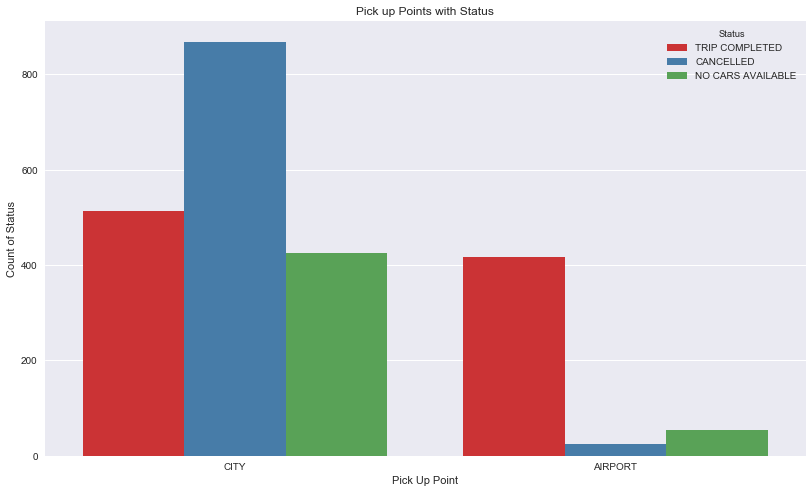

In [263]:
# This Graph shows the frequencies of Time Slots which are in high demand as well as the Trip Status
uberdata_morning = uberdata[(uberdata.Time_Slot=='MORNING_RUSH')]

plt.figure(figsize=(30, 8))
sns.set(style="darkgrid")
plt.subplot(1, 2, 1)
sns.countplot(data = uberdata_morning, x='Pickup_point', hue = 'Status', order=uberdata_morning.Pickup_point.value_counts().index, palette="Set1")
plt.title("Pick up Points with Status")
plt.xlabel("Pick Up Point")
plt.ylabel("Count of Status")
plt.show()


In [264]:
# As we can see from the Graph and the dataset, there is a lot of demand in the Evening and Morning
uberdata_morning.groupby(['Pickup_point', 'Time_Slot', 'Status'])['Pickup_point'].count()

Pickup_point  Time_Slot     Status           
AIRPORT       MORNING_RUSH  CANCELLED             25
                            NO CARS AVAILABLE     55
                            TRIP COMPLETED       418
CITY          MORNING_RUSH  CANCELLED            869
                            NO CARS AVAILABLE    425
                            TRIP COMPLETED       514
Name: Pickup_point, dtype: int64

### It is evident that during the "MORNING_RUSH" there are 869 Trips that have been cancelled from CITY to AIRPORT

## 7a. Demand in the Morning from City to Airport

In [265]:
## Demand in the Morning from City
demand_from_city = len(uberdata_morning.loc[(uberdata_morning.Pickup_point=='CITY')])
demand_from_city

1808

## 7b. Supply of Vehicles in the Morning from City 

In [266]:
supply_from_city = len(uberdata_morning.loc[(uberdata_morning.Status=='TRIP COMPLETED') 
& (uberdata_morning.Pickup_point=='CITY')])

supply_from_city

514

## 7c. Gap between Supply and Demand from City to Airport during Morning Rush

In [267]:
gap_morning_from_city = round(100*supply_from_city / demand_from_city,2)
gap_morning_from_city

28.43

### Only ~28.42% of requests were serviced during the MORNING_RUSH from CITY to AIRPORT

In [268]:
len(uberdata_morning.loc[(uberdata_morning.Status=='TRIP COMPLETED')])

932

In [269]:
# Check the Reason why most requests were not satisfied

no_cars_from_city = len(uberdata_morning.loc[(uberdata_morning.Status=='NO CARS AVAILABLE') 
& (uberdata_morning.Pickup_point=='CITY')])

no_cars_from_city

425

In [270]:
# Number of rides cancelled from Airport to City during the Evening

cancelled_from_city = len(uberdata_morning.loc[(uberdata_morning.Status=='CANCELLED') 
& (uberdata_morning.Pickup_point=='CITY')])

cancelled_from_city

869

In [271]:
non_serviced_cars_from_city = round(100*no_cars_from_city / demand_from_city,2)
non_serviced_cars_from_city

23.51

### Around 23.51% of requests were not servicable during the MORNING_RUSH from City to Airport due to "NO CARS AVAILABLE"

In [272]:
non_serviced_cancelled_from_city = round(100*cancelled_from_city / demand_from_city,2)
non_serviced_cancelled_from_city

48.06

### Around 48.06% of requests were not servicable during the MORNING_RUSH from City to Airport due to "CANCELLED"